In [1]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy
%matplotlib inline

In [2]:

os.chdir("D:/NitinCSV/Iris")
df = pd.read_csv("iris.csv" )
df_iris = copy.deepcopy(df)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [16]:
df.drop("Id", inplace = True, axis =1)

## create test data

In [17]:
X = df.drop('Species', 1)  
y = df['Species'] 

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## Normalize dataset

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Implement PCA

In [96]:
from sklearn.decomposition import PCA

#pca = PCA(n_components=4)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## get variance caused by each of the principal components
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.72226528 0.23974795 0.03338117 0.0046056 ]


## Training and Making Predictions

In [97]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score


classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  

## Performance Evaluation
cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy: {0}'.format(accuracy_score(y_test, y_pred)) )

[[11  0  0]
 [ 0 10  3]
 [ 0  1  5]]
Accuracy: 0.866666666667


In [ ]:
# with 1
[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy: 0.933333333333

In [ ]:
# with 2
[[11  0  0]
 [ 0 10  3]
 [ 0  2  4]]
Accuracy: 0.833333333333

In [ ]:
with 3
[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy: 0.933333333333
    
    

In [ ]:
# with 4
[[11  0  0]
 [ 0 10  3]
 [ 0  1  5]]
Accuracy: 0.866666666667

In [68]:

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## get variance caused by each of the principal components
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)  

## Performance Evaluation
cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy: {0}'.format(accuracy_score(y_test, y_pred),'.3f') )


[0.92597835]
[[11  0  0]
 [ 0 12  1]
 [ 0  2  4]]
Accuracy: 0.9


## Combine in one function - PCA level will be input

In [55]:
def RandomForestWithPCALevel(level):
    
    from sklearn.model_selection import train_test_split
    from sklearn.decomposition import PCA
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import confusion_matrix  
    from sklearn.metrics import accuracy_score


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

    pca = PCA(n_components=level)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    ## get variance caused by each of the principal components
    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)

    classifier = RandomForestClassifier(max_depth=2, random_state=0)  
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)  

    ## Performance Evaluation
    cm = confusion_matrix(y_test, y_pred)  
    print(cm)  
    print('Accuracy: {0}'.format(accuracy_score(y_test, y_pred)) )


In [56]:
RandomForestWithPCALevel(3)

[0.92597835 0.0536899  0.01568407]
[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy: 0.933333333333


In [57]:
RandomForestWithPCALevel(2)

[0.92597835 0.0536899 ]
[[11  0  0]
 [ 0  4  9]
 [ 0  3  3]]
Accuracy: 0.6


In [58]:
RandomForestWithPCALevel(1)

[0.92597835]
[[11  0  0]
 [ 0 12  1]
 [ 0  2  4]]
Accuracy: 0.9


In [59]:
RandomForestWithPCALevel(4)

[0.92597835 0.0536899  0.01568407 0.00464768]
[[11  0  0]
 [ 0 12  1]
 [ 0  2  4]]
Accuracy: 0.9


## Principle Component Analysis (PCA) for Data Visualization

In [98]:
data  = df_iris

In [100]:
data.drop("Id",inplace=True,axis =1)

In [101]:
X = df.drop('Species', 1)  
y = df['Species'] 

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = pca.fit_transform(X)

In [110]:
principalDF = pd.DataFrame(data = X, columns = ['principal component 1', 'principal component 2'])
principalDF.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [111]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [113]:
finalDF = pd.concat([principalDF,data[['Species']]] ,axis=1)
finalDF.head()
                     

,principal component 1,principal component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


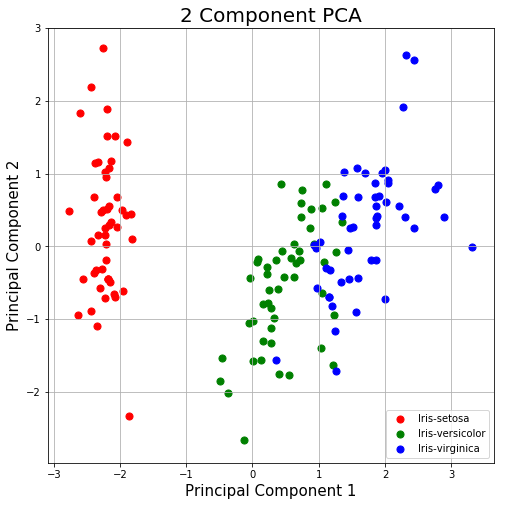

In [116]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Species'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1']
               , finalDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

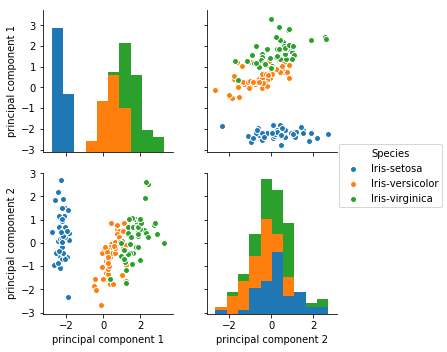

In [117]:
import seaborn as sns
g = sns.pairplot(finalDF , hue ="Species")

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns;
#g = sns.pairplot(finalDF , hue ="Species")
g = sns.scatterplot(x="principal component 1", y="principal component 2" , hue="Species" , data="finalDF")

AttributeError: 'module' object has no attribute 'scatterplot'